# \<Title\>

Imports

In [35]:
# imports
import sys
import datetime
import matplotlib.pyplot as plt

Import custom libraries

In [60]:
# original py files
sys.path.insert(1, r'W:\OneDrive - TU Eindhoven\DS&AI\2024-2025\2024-2025 q1\2AMM20 - Research Topics in Data Mining\Research Project Phase\auto-encoder paper\new_code\methods')

from data_methods import getData, standardize
from dimensionality_reduction import reduce_dimensionality,reduce_with
from beamSearch import EMM, as_string
from adjPysubgroup import adjustedBestFirstSearch, adjustedDFS, adjustedApriori
from qualityMeasures import calc_result_bs, calc_result_ps

set variables

In [61]:
dataset_name = 'Ionosphere'
reduction_method = 'PCA' # choose from 'PCA' or 'auto_encoder' (others were not implemented yet)
# ...

## 1. Data

Open the dataset with name ```dataset_name```.

In [38]:
df, cat, num, features = getData(dataset_name)
df_original = df.copy()

Standardize the DataFrame <font color='red'>move to reduce_dimensionality method??</font>

In [39]:
# standardize
# df_std = standardize(df,num) # ? MOVE TO reduce_dimensionality FUNCTION??

## 2. Reduce Dimensionality

### 2.1 Find Optimal Number of Reduced Features

Set lower and upper bound estimates for the number of features 

In [40]:
l_est, r_est = 2, 12

Compare the <font color='red'>MSE</font> of performing dimensionality reduction to different numbers of features.

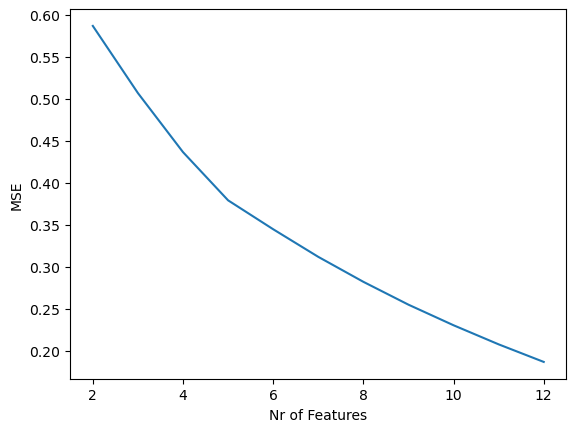

0.132551

In [47]:
t1 = datetime.datetime.now()
mseList = []

for i in range(l_est, r_est+1):

    df_en,mse = reduce_dimensionality(
                    data=df,
                    reduction_method=reduction_method,
                    catColumns=cat,
                    numColumns=num, 
                    nFeatures=i,
                    nEpochs=100
                )
    
    mseList.append(mse)
t2 = datetime.datetime.now()

plt.plot([i for i in range(l_est, r_est+1)], mseList)
plt.xlabel("Nr of Features") # ! new
plt.ylabel("MSE") # ! new
plt.show()

running_time = t2-t1
running_time.total_seconds()

From the results we can conclude that the optimal number of reduced features is ... 

In [51]:
optimal_nr_features = 5

### 2.2 reduce

In [55]:
df_en,_ = reduce_dimensionality(
            data=df,
            reduction_method=reduction_method,
            catColumns=cat,
            numColumns=num, 
            nFeatures=optimal_nr_features,
            nEpochs=100
        )

df_en.sample(5)

,target,PC1,PC2,PC3,PC4,PC5
158,0,1.538411,-0.456752,-1.493062,-0.504907,-0.196616
334,1,-3.833350,0.139706,0.847891,0.326811,0.152140
258,1,-1.663069,0.549608,-0.059016,0.126336,0.440339
124,0,2.128837,-0.171527,-0.597128,0.269459,1.495696
147,1,-3.911710,0.150842,0.741003,0.164370,0.058516


## 3. Subgroup Discovery
Run the subgroup discovery algorithms on the dataset.

### 3.1 Beam Search

#### 3.1.1 Find Subgroups

In [57]:
t1 = datetime.datetime.now()
output = EMM(100, 3, 100, [], df_original, features, 'target', ensure_diversity=True)
t2 = datetime.datetime.now()
running_time = t2-t1
running_time

level :  0
    seed :  []
eta  []
level :  1
    seed :  ['attribute21 > 0.0']
eta  ['attribute21 > 0.0']
    seed :  ['attribute22 > -0.14815']
eta  ['attribute22 > -0.14815']
    seed :  ['attribute25 > -0.47137']
eta  ['attribute25 > -0.47137']
    seed :  ['attribute29 > -0.38059']
eta  ['attribute29 > -0.38059']
    seed :  ['attribute11 > -0.002969999999999957']
eta  ['attribute11 > -0.002969999999999957']
    seed :  ['attribute23 > 0.0']
eta  ['attribute23 > 0.0']
    seed :  ['attribute23 > -0.366885']
eta  ['attribute23 > -0.366885']
    seed :  ['attribute25 > -0.33239']
eta  ['attribute25 > -0.33239']
    seed :  ['attribute16 <= -0.09483']
eta  ['attribute16 <= -0.09483']
    seed :  ['attribute33 <= -0.16535']
eta  ['attribute33 <= -0.16535']
    seed :  ['attribute15 > -0.081705']
eta  ['attribute15 > -0.081705']
    seed :  ['attribute5 > -0.06151']
eta  ['attribute5 > -0.06151']
    seed :  ['attribute15 > -0.15616']
eta  ['attribute15 > -0.15616']
    seed :  ['attrib

KeyboardInterrupt: 

In [ ]:
t1 = datetime.datetime.now()
features_en = [i for i in df_en.columns if 'cat' in i]
output_en = EMM(100, 3, 100, [], df_en, features_en, 'target', ensure_diversity=True)
t2 = datetime.datetime.now()
running_time = t2-t1
running_time

#### 3.1.2 Analyze Subgroups

The results are summarized below

In [ ]:
subgroups_n = [i for i in output.get_values()]
subgroups_en = [i for i in output_en.get_values()]

calc_result_bs(df_en, df, subgroups_en, subgroups_n)

### 3.2 Best First Search

Find Subgroups

In [ ]:
t1 = datetime.datetime.now()
results_df_n = adjustedBestFirstSearch(df)
t2 = datetime.datetime.now()
running_time = t2-t1
running_time

In [ ]:
t1 = datetime.datetime.now()
results_df_en = adjustedBestFirstSearch(df_en)
t2 = datetime.datetime.now()
running_time = t2-t1
running_time

Analyze found subgroups

In [ ]:
calc_result_ps(df_en, df, results_df_en, results_df_n)

### 4. Interpretability Measures